In [25]:
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 6, 3

In [26]:
with open('NewDrugs_SP_Experiments.pkl', 'rb') as handle:
    GF_Experiments = pickle.load(handle)


In [27]:
GF_Experiments_summary = [GF_Experiments['filter_1'], GF_Experiments['filter_2'],GF_Experiments['filter_3'],GF_Experiments['filter_4'],GF_Experiments['filter_5'],
                           GF_Experiments['filter_6'],GF_Experiments['filter_7'],GF_Experiments['filter_8'],GF_Experiments['filter_9'],GF_Experiments['filter_10']]

true_sp_summary = [GF_Experiments['filter_1']['true_sp'], GF_Experiments['filter_2']['true_sp'],GF_Experiments['filter_3']['true_sp'],GF_Experiments['filter_4']['true_sp'],GF_Experiments['filter_5']['true_sp'],
                           GF_Experiments['filter_6']['true_sp'],GF_Experiments['filter_7']['true_sp'],GF_Experiments['filter_8']['true_sp'],GF_Experiments['filter_9']['true_sp'],GF_Experiments['filter_10']['true_sp']]


KeyError: 'filter_2'

In [5]:
max_value = max(true_sp_summary)
max_index = true_sp_summary.index(max_value)

In [6]:
max_value, max_index

(0.28349240014139276, 0)

In [16]:
#efficient_afa
Exp_efficient_afa = GF_Experiments['filter_1']['afa']['experiments']
AFA_Mean_GF =[Exp_efficient_afa[Exp_efficient_afa["Experiment"] == i+1]["error"].mean() for i in range(10)]
AFA_std_GF = [Exp_efficient_afa[Exp_efficient_afa["Experiment"] == i+1]["error"].std() for i in range(10)]

AFA_lower_CI_GF = [AFA_Mean_GF[i] - 1.96* AFA_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]
AFA_upper_CI_GF = [AFA_Mean_GF[i] + 1.96* AFA_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]

In [17]:
# baseline 1: iid
Exp_iid = GF_Experiments['filter_1']['iid']['experiments']

IID_Mean_GF = [Exp_iid[Exp_iid["Experiment"] == i+1]["error"].mean() for i in range(10)]
IID_std_GF = [Exp_iid[Exp_iid["Experiment"] == i+1]["error"].std() for i in range(10)]

IID_lower_CI_GF = [IID_Mean_GF[i] - 1.96* IID_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]
IID_upper_CI_GF = [IID_Mean_GF[i] + 1.96* IID_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]

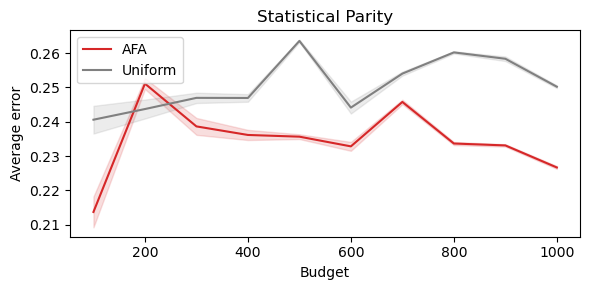

In [18]:
budgets_zhang = [500, 600, 800,900, 1000]
budgets = [100, 200, 300, 400, 500,600,700,800,900,1000]


plt.plot(budgets, AFA_Mean_GF, color = 'C3', label="AFA")
plt.fill_between(budgets,AFA_lower_CI_GF, AFA_upper_CI_GF, color = 'C3', alpha =.15)

plt.plot(budgets, IID_Mean_GF, color = 'grey', label="Uniform")
plt.fill_between(budgets,IID_lower_CI_GF, IID_upper_CI_GF, color = 'grey', alpha =.15)


plt.legend(loc = "upper left")
plt.ylabel("Average error")
plt.xlabel("Budget")
plt.tight_layout()
plt.title('Statistical Parity')
plt.tight_layout()
plt.savefig("GF_multiclass.pdf")
plt.show()

/tmp/ipykernel_643208/596430455.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab20')  # You can choose other colormaps like 'viridis', 'plasma', etc.


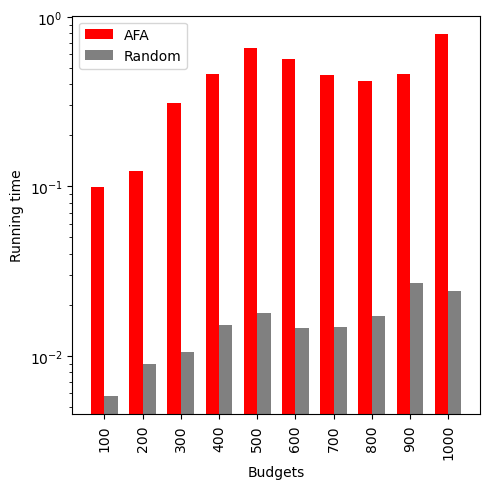

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm


AFA_computation = GF_Experiments['filter_1']['afa']['computation_time_afa']
TC_AFA = []
for i in range(0, len(AFA_computation), 3):
    sequence = AFA_computation[i:i+3]
    mean_value = sum(sequence) / len(sequence)
    TC_AFA.append(mean_value)

TC_IID = []
IID_computation = GF_Experiments['filter_1']['iid']['computation_sp_iid']

for i in range(0, len(IID_computation), 3):
    sequence = IID_computation[i:i+3]
    mean_value = sum(sequence) / len(sequence)
    TC_IID.append(mean_value)

# Convert categories to indices
categories = np.arange(len(budgets))
values1 = TC_AFA
values2 = TC_IID

# Get a colormap
colormap = cm.get_cmap('tab20')  # You can choose other colormaps like 'viridis', 'plasma', etc.

# Get colormaps
keys = budgets
colors1 = 'red'
colors2 = 'grey'

# X locations for the groups
x = np.arange(len(categories))

# Width of the bars
width = 0.35

fig, ax = plt.subplots(figsize=(5, 5))

# Plotting the bars
bars1 = ax.bar(x - width/2, values1, width, color=colors1, label='AFA')
bars2 = ax.bar(x + width/2, values2, width, color=colors2, label='Random')

# Adding labels and title
plt.xlabel('Budgets', fontsize=10)
plt.ylabel('Running time', fontsize=10)
#plt.title('Statistical parity running time')
plt.xticks(x, keys, fontsize=10, rotation=90)
plt.yticks(fontsize=10) 
plt.yscale('log')
plt.tight_layout()
ax.legend()
plt.savefig("SP_drugs_runtime.pdf")
plt.show()

In [28]:
Exp_iid

,Iteration,Experiment,Estimated_Group_Fairness,error
0,1,1,0.059406,0.224086
1,1,2,0.059701,0.223791
2,1,3,0.023256,0.260237
3,1,4,0.047382,0.236111
4,1,5,0.015968,0.267524
5,1,6,0.016639,0.266853
6,1,7,0.037090,0.246403
7,1,8,0.028714,0.254778
8,1,9,0.031077,0.252416
9,1,10,0.029970,0.253522


In [29]:
Exp_efficient_afa

,Iteration,Experiment,Estimated_Group_Fairness,error
0,1,1,0.089710,0.193782
1,1,2,0.022428,0.261065
2,1,3,0.069775,0.213718
3,1,4,0.056069,0.227424
4,1,5,0.053826,0.229666
5,1,6,0.034887,0.248605
6,1,7,0.044855,0.238637
7,1,8,0.050462,0.233030
8,1,9,0.048178,0.235315
9,1,10,0.049341,0.234152
